In [1]:
############################### Loading necessary libraries ###########################

# Libraries for data analysis
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Libraries for downloading stock data from "Yahoo Finance"
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as wb

In [2]:
# Defining a fucntion get_data to extract data from "Yahoo Finance"
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [3]:
# Extracting data for all 6 stocks in our portfolio 
import datetime

# Specifying the stocks- with their tickers 
stockList = ['TSLA','YAMCY','PM','TATAMOTORS.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS']
stocks = [stock for stock in stockList]

# Specifying the end date
endDate = datetime.date(2023, 1, 31)

# Speicfying the start date
startDate = datetime.date(2015, 1, 1)

# Getting the mean returns for our stocks
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

# Assigning weights to each stock in the portfolio
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)


[*********************100%%**********************]  6 of 6 completed


In [4]:
# Printing the mean returns and weights assigned for each stock
print('Mean Returns are: ')
print(meanReturns)
print()
print('Weights are: ')
print(weights)


Mean Returns are: 
Ticker
HDFCBANK.NS      0.000687
HINDUNILVR.NS    0.000687
PM               0.000234
TATAMOTORS.NS    0.000324
TSLA             0.001792
YAMCY            0.000662
dtype: float64

Weights are: 
[0.0527693  0.21393502 0.31719945 0.10236811 0.02675183 0.28697628]


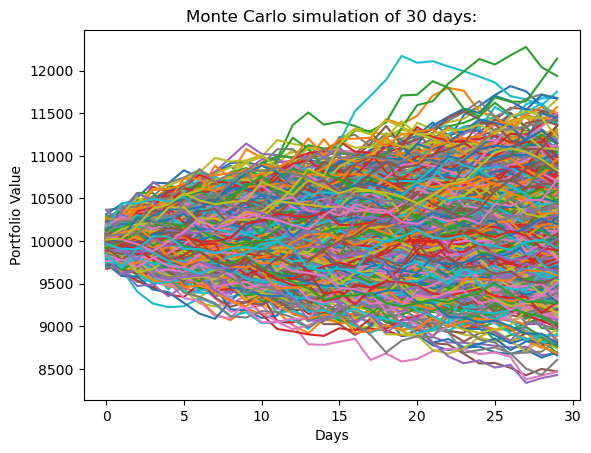

In [5]:
# Monte Carlo simulation for 30 days
mc_sims = 1000
T = 30
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights))) #uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1) * initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value')
plt.xlabel('Days')
plt.title('Monte Carlo simulation of 30 days:')
plt.show()

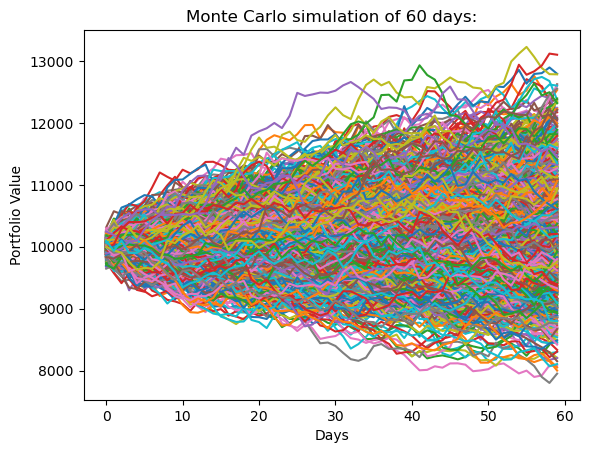

In [6]:
# Monte Carlo simulation for 60 days
mc_sims = 1000
T = 60
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights))) #uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1) * initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value')
plt.xlabel('Days')
plt.title('Monte Carlo simulation of 60 days:')
plt.show()

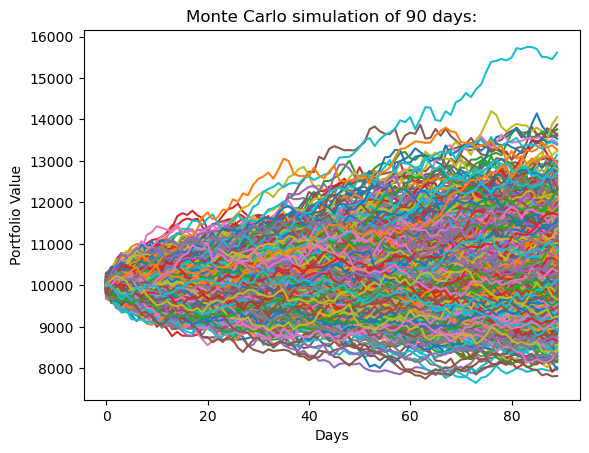

In [7]:
# Monte Carlo simulation for 90 days
mc_sims = 1000
T = 90
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights))) #uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1) * initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value')
plt.xlabel('Days')
plt.title('Monte Carlo simulation of 90 days:')
plt.show()